# Exercises

In [1]:
import pandas as pd 
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans

### 1. Clustering with the Iris Dataset

Using this lesson as a guide, perform clustering on the iris dataset.

    a. Choose features other than the ones used in the lesson.
    b. Visualize the results of your clustering.
    c. Use the elbow method to visually select a good value for k.
    d. Repeat the clustering, this time with 3 different features.

In [2]:
iris = sns.load_dataset('iris')

In [3]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# selecting our features to cluster
X = iris[['sepal_length', 'sepal_width']]

In [5]:
# selecting our clustering object
kmeans = KMeans(n_clusters=3)
# fit our data
kmeans.fit(X)
# predict
kmeans.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2], dtype=int32)

In [6]:
# throw our predictions into our dataset as 'clusters'
iris['clusters'] = kmeans.predict(X)

Text(0.5, 1.0, 'K-Means clusters')

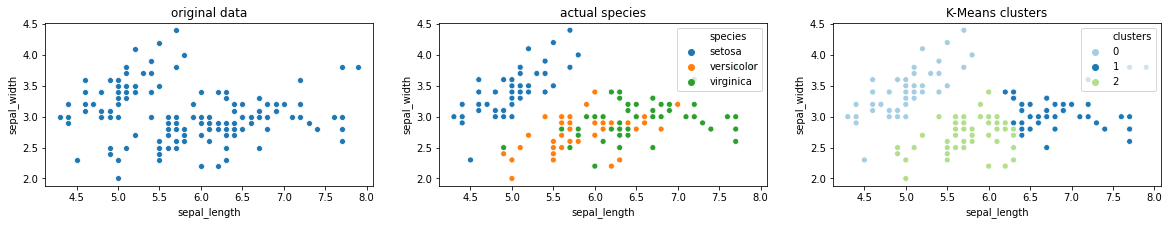

In [7]:
# now we visualize
plt.figure(figsize=(20,3))
x = 'sepal_length'
y = 'sepal_width'

plt.subplot(131)
sns.scatterplot(x='sepal_length', y='sepal_width', data=iris)
plt.title('original data')

plt.subplot(132)
sns.scatterplot(x, y, data=iris, hue='species')
plt.title('actual species')

plt.subplot(133)
sns.scatterplot(x, y, data=iris, hue='clusters', palette="Paired")
plt.title('K-Means clusters')

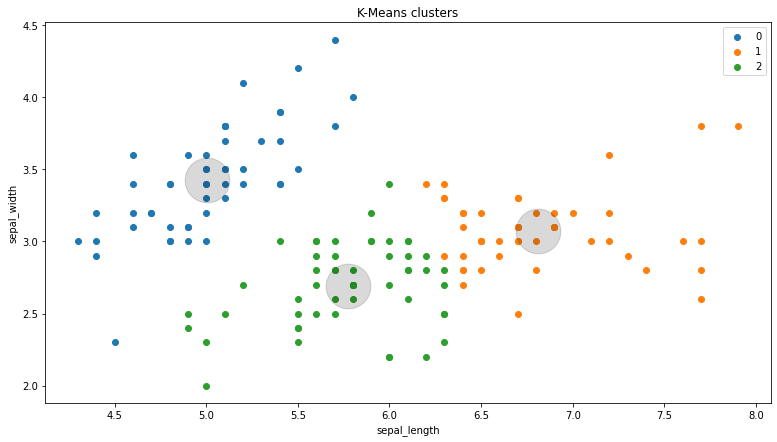

In [9]:
plt.figure(figsize=(13, 7))
for cluster, subset in iris.groupby('clusters'):
    plt.scatter(subset.sepal_length, subset.sepal_width, label=cluster)
    plt.title('K-Means clusters')

centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids.plot.scatter(x='sepal_length', y='sepal_width', ax=plt.gca(), alpha=.15, s=2000, c='black')
plt.legend()
    

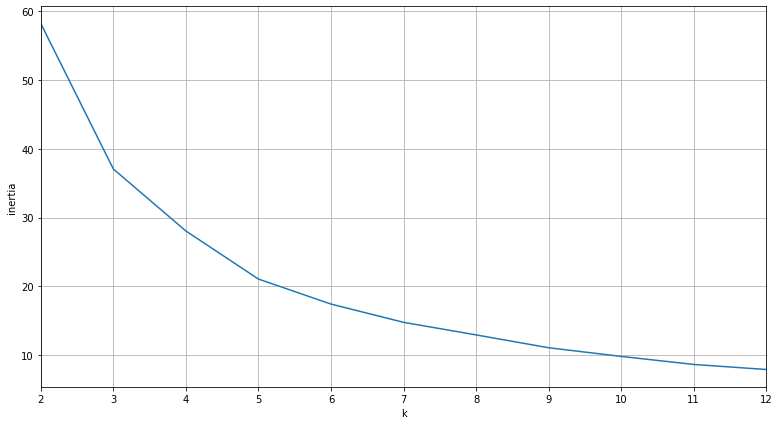

In [10]:
# using the elbow method to visually select a good value for k

def get_inertia(k):
    kmeans = KMeans(k)
    kmeans.fit(X)
    return kmeans.inertia_

plt.figure(figsize=(13, 7))
pd.Series({k: get_inertia(k) for k in range(2, 13)}).plot()
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(range(2, 13))
plt.grid()



A k around 4 or 5 would be a good fit

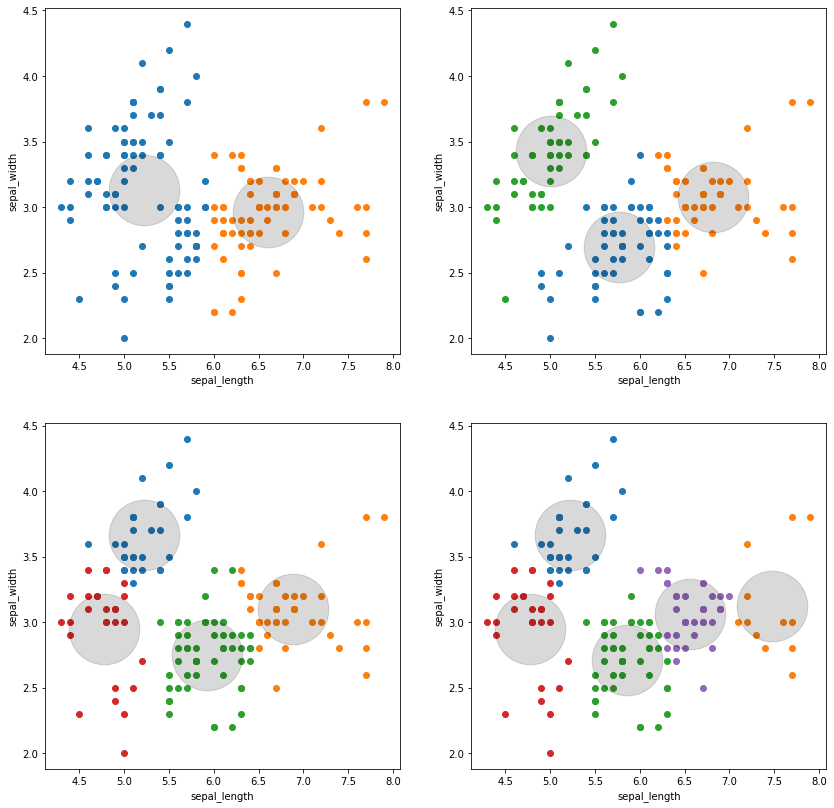

In [11]:
plt.figure(figsize=(14, 14))
for i, k in enumerate([2,3,4,5]):
    plt.subplot(2, 2, i + 1)
    kmeans = KMeans(k)
    kmeans.fit(X)
    iris['cluster'] = kmeans.predict(X)
    iris.cluster = 'cluster ' + iris.cluster.astype(str)
    for cluster, subset in iris.groupby('cluster'):
        plt.scatter(subset.sepal_length, subset.sepal_width, label=cluster)
        
    centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
    centroids.plot.scatter(x='sepal_length', y='sepal_width', ax=plt.gca(), alpha=.15, s=5000, c='black')
    
plt.title=(f'k = {k}')

In [12]:
# repeats clustering but with 3 different features
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,clusters,cluster
0,5.1,3.5,1.4,0.2,setosa,0,cluster 0
1,4.9,3.0,1.4,0.2,setosa,0,cluster 3
2,4.7,3.2,1.3,0.2,setosa,0,cluster 3
3,4.6,3.1,1.5,0.2,setosa,0,cluster 3
4,5.0,3.6,1.4,0.2,setosa,0,cluster 0


In [13]:
# selecting 3 features
X = iris[['petal_length', 'sepal_width', 'petal_width']]

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

iris['cluster2'] = kmeans.predict(X)

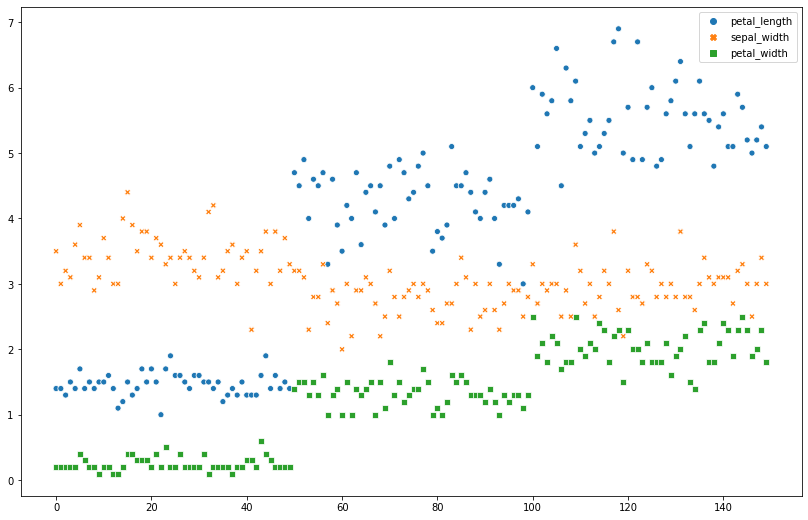

In [14]:
#visualizing clusters
plt.figure(figsize=(14,9))

sns.scatterplot(data=X, hue=iris.cluster2)

### 2. Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [15]:
from wrangle_mall import get_mall_data

In [16]:
df = get_mall_data()

In [17]:
df.head()

,customer_id,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [18]:
X = df[['age', 'spending_score']]

kmeans = KMeans(n_clusters=3)

kmeans.fit(X)

df['cluster'] = kmeans.predict(X)

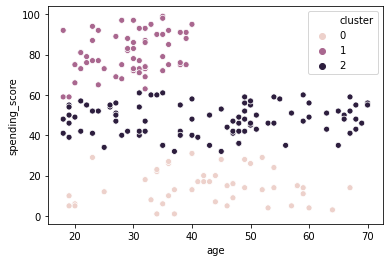

In [19]:
sns.scatterplot(x='age', y='spending_score', hue='cluster', data=df)

In [20]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)

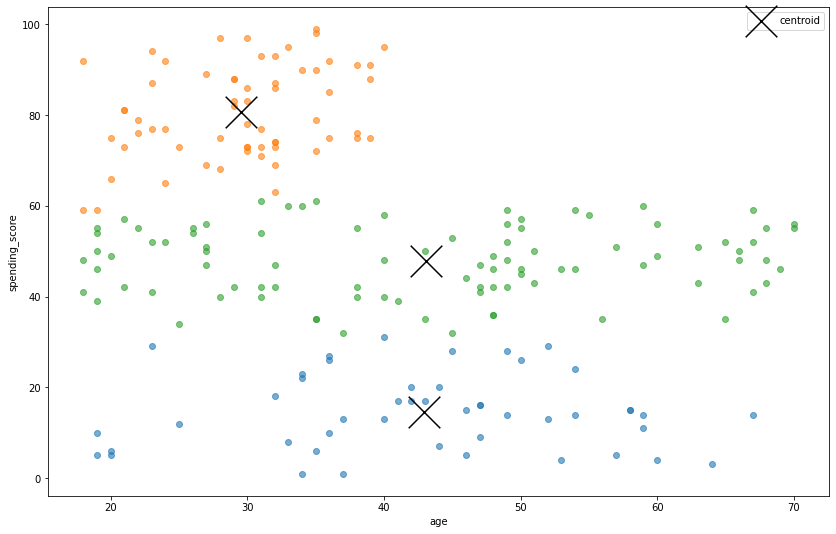

In [21]:
plt.figure(figsize=(14,9))

for cluster, subset in df.groupby('cluster'):
    plt.scatter(subset.age, subset.spending_score, label='cluster ' + str(cluster), alpha=.6)
    
centroids.plot.scatter(x='age', y='spending_score', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid') 



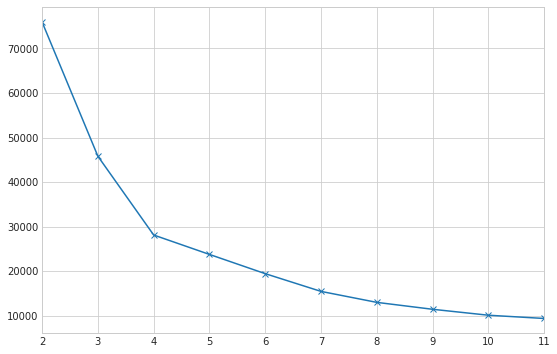

In [22]:
# seasrching for optimal k value
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9,6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks=(range(2,12))
    plt.xlabel=('k')
    plt.ylabel=('inertia')
    plt.title=('change in inertias as k increases')

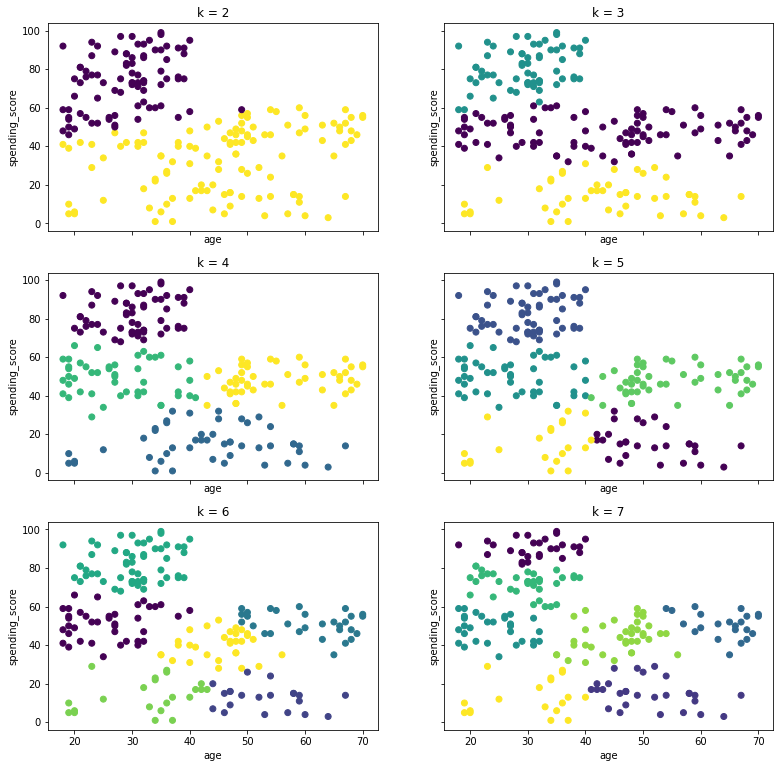

In [23]:
fig, axs = plt.subplots(3, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 8)):
    clusters = KMeans(k).fit(X).predict(X)
    ax.scatter(X.age, X.spending_score, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='age', ylabel='spending_score')
    
#centroids.plot.scatter(x='age', y='spending_score', c='black', marker='x', s=1000, ax=plt.gca(), label='centroid')  


### 3. How does scaling impact the results of clustering?

Compare k-means clustering results on scaled and unscaled data. You can show how the resulting clusters differ either with descriptive statistics or visually.

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
X.head(2)

,age,spending_score
0,19,39
1,21,81


In [26]:
scaler = MinMaxScaler()

scaler.fit(X)

X_scaled = scaler.transform(X)

In [62]:
X_scaled = pd.DataFrame(X_scaled)

X_scaled

,0,1
0,0.019231,0.387755
1,0.057692,0.816327
2,0.038462,0.051020
3,0.096154,0.775510
4,0.250000,0.397959
...,...,...
195,0.326923,0.795918
196,0.519231,0.275510
197,0.269231,0.744898
198,0.269231,0.173469


In [66]:
#data = {'age' : X_scaled[0], "spending_score": X_scaled[1]}

#X_scaled = pd.DataFrame(data=X_scaled[1:1,:], index=X_scaled[1:,0], columns=X_scaled[0,1:])

df['scaled_age'] = X_scaled['0']
df['scaled_spending_score'] = X_scaled['1']

KeyError: '0'

In [ ]:
kmeans = KMeans(n_clusters=3)

kmeans.fit(X_scaled)

df['cluster'] = kmeans.predict(X_scaled)

In [ ]:
sns.scatterplot(x='age', y='spending_score', hue='cluster', data=df)

In [ ]:
X_scaled[0]

In [ ]:
X_scaled = pd.DataFrame(X_scaled)

In [ ]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X_scaled.columns)

In [ ]:
plt.figure(figsize=(14,9))

for cluster, subset in df.groupby('cluster'):
    plt.scatter(subset.age, subset.spending_score, label='cluster ' + str(cluster), alpha=.6)
    
centroids.plot.scatter(X_scaled[0], X_scaled[1], c='black', marker='x', s=1000, ax=plt.gca(), label='centroid') 